In [24]:
from openpyxl import load_workbook
import numpy as np
import pandas as pd
import os

# P1: check first few lines, visualize features, and display the scatter matrix of 6 features

In [25]:
filePath = os.path.join('DryBeanDataset','Dry_Bean_Dataset.xlsx')
wb = load_workbook(filename = filePath)
ws = wb['Dry_Beans_Dataset']
data = ws.values
columns = next(data)[0:]
df = pd.DataFrame(data, columns=columns)

In [26]:
 print(df.head())

    Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0  28395    610.291       208.178117  ...      0.834222      0.998724  SEKER
1  28734    638.018       200.524796  ...      0.909851      0.998430  SEKER
2  29380    624.110       212.826130  ...      0.825871      0.999066  SEKER
3  30008    645.884       210.557999  ...      0.861794      0.994199  SEKER
4  30140    620.134       201.847882  ...      0.941900      0.999166  SEKER

[5 rows x 17 columns]


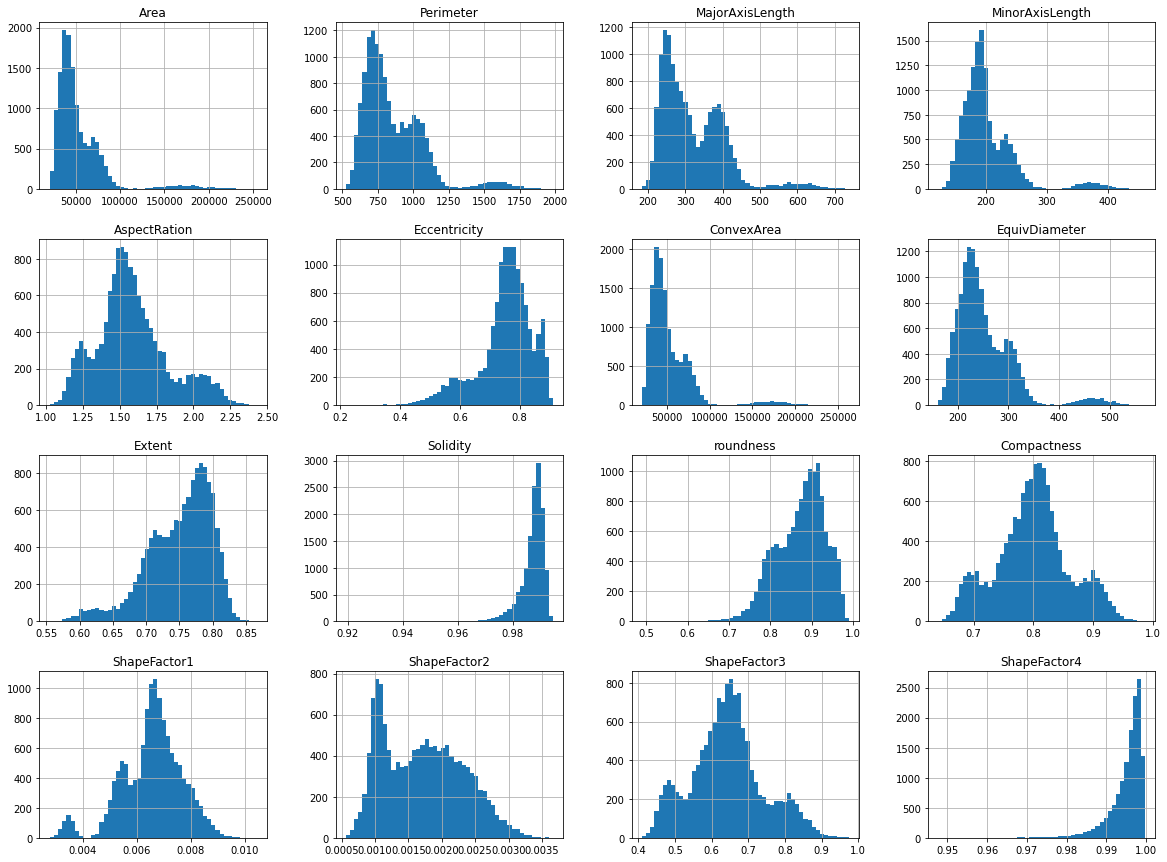

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

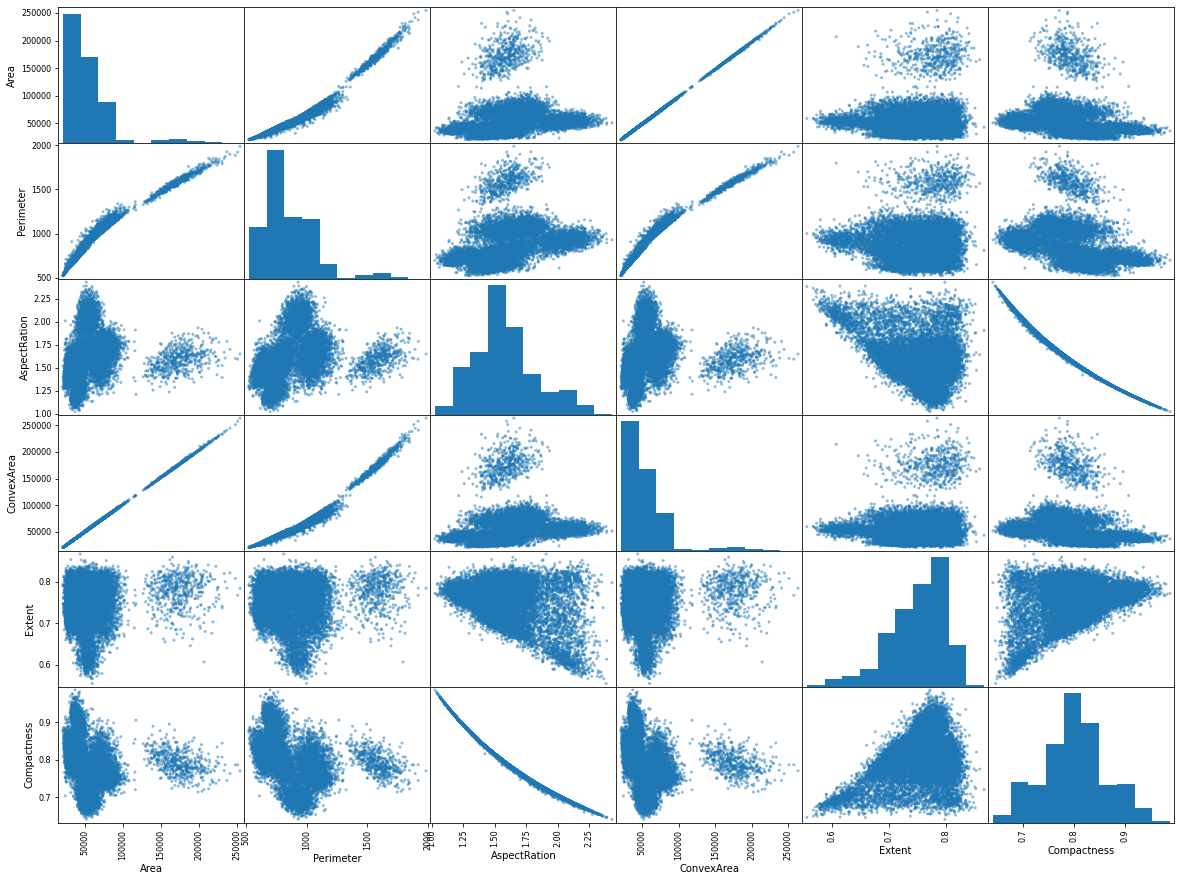

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["Area", "Perimeter", "AspectRation","ConvexArea","Extent","Compactness"]
scatter_matrix(df[attributes], figsize=(20,15));

* I find area and perimeter and convexArea are positive related.
* AspectRation and compactness are negative related.
* Extent and AspectRation are negative related, Extent and compactness are positive related.
* The other attributes are unrelated

# P2: Find out the fewest instances of class

In [29]:
print(df['Class'].value_counts())

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


'BOMBAY' has the fewest instances (522)

# P3: split train test set and find out their size

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=1)

In [31]:
labels_train = train_set['Class'].copy().values
train = train_set.drop(columns=['Class']).values

labels_test = test_set['Class'].copy().values
test = test_set.drop(columns=['Class']).values

In [32]:
print("Train set size:", len(train))

Train set size: 10888


In [33]:
print("Test set size:", len(test))

Test set size: 2723


# P4: Feature scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

# P5: Use Support Vector Classifier

In [35]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

rbf_SVC = Pipeline([
                    ("scaler", MinMaxScaler()),
                    ("svm_clf", SVC(kernel="rbf", degree=3, coef0=1, C=5))
])
rbf_SVC.fit(train_scaled,labels_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [36]:
pred = rbf_SVC.predict(test_scaled)

I use 'confusion_matrix & ConfusionMatrixDisplay' to display the confusion matrix here.  
I also use 'plot_confusion_matrix' below.  
(The difference of this two is: first one don't need classifier as param, second one need it)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def draw_matrix(labels_test,pred):
  cm = confusion_matrix(labels_test, pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY'])
  fig, ax = plt.subplots(figsize=(12,12))
  cmd.plot(ax=ax,values_format='d')

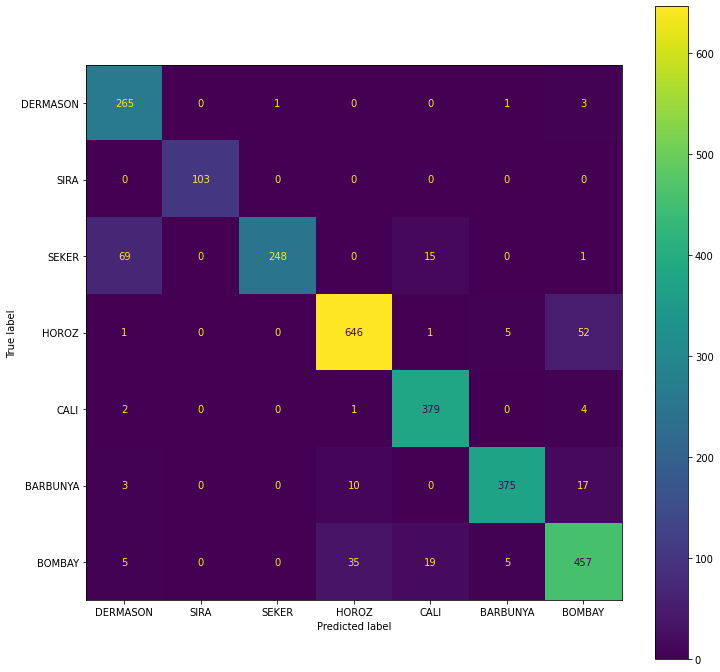

In [38]:
draw_matrix(labels_test,pred) 

# P6: SGDClassifier

In [39]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(train_scaled, labels_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
pred_sgd = sgd_clf.predict(test_scaled)

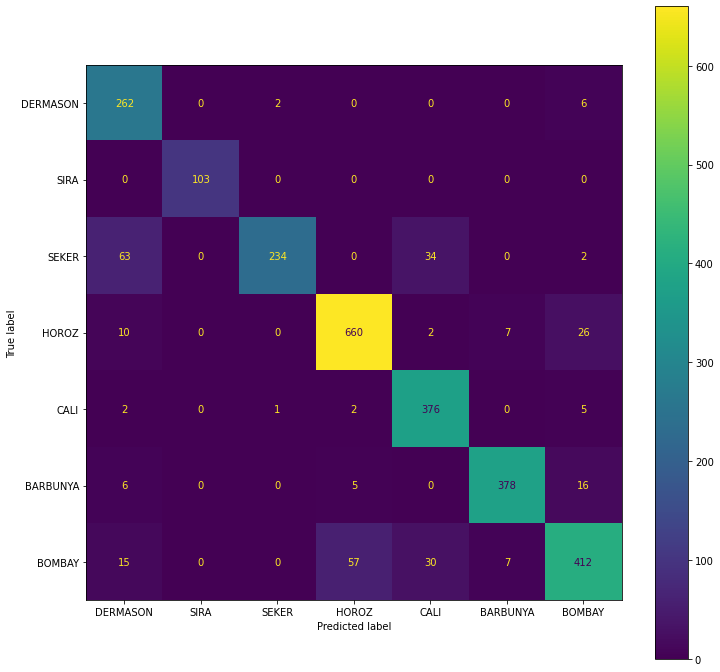

In [41]:
draw_matrix(labels_test,pred_sgd) 

### *The above is used 'confusion_matrix' & 'ConfusionMatrixDisplay'.*

### *Below will use 'plot confusion matrix' as lab sheet requirement.*


In [42]:
from sklearn.metrics import plot_confusion_matrix

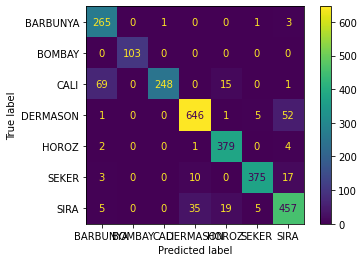

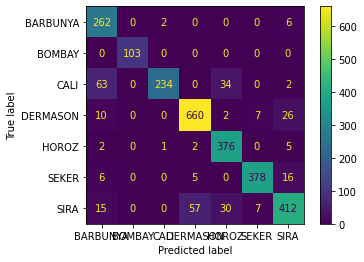

In [43]:
plot_confusion_matrix(rbf_SVC, test_scaled, labels_test, values_format='d')
plot_confusion_matrix(sgd_clf, test_scaled, labels_test, values_format='d')

# P7: Experimental result 

Compare those two confusion matrices (both use 'confusion_matrix' and 'plot_confusion_matrix'),  
I find the SVC classifier is better than sdg classifier in this experiment.  
SVC classifier predicted a higher number of successes.  
The accuracy of SVC classifier is higher.